# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

# idx = np.random.permutation(len(full_train.x))
# full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]
full_train_x,full_train_y = full_train.x, full_train.y


del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//6,:], full_train_x[full_train_x.shape[0]//6:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//6,:], full_train_y[full_train_y.shape[0]//6:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(15552, 1000, 102) y:(15552, 1)
Validation data: x:(3110, 1000, 102) y:(3110, 1)


## Model

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_name = 'boosting_lstm_new'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True),input_shape=(1000,102)),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

    model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4,0.9,0.999),
              metrics=['accuracy',tf.keras.metrics.AUC()])
    
    if show_summary:
        model.summary()
    
    return model
    
num_of_bags = 10
epochs_per_bag = 250
start_from_bag = 0


## Training with Boosting

Training bag 0
[1. 1. 1. ... 1. 1. 1.]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1000, 128)         85504     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 102,145
Trainable params: 102,145
Non-trainable params: 0
_________________________________________________________________
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 21s

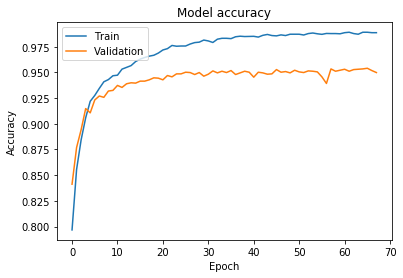

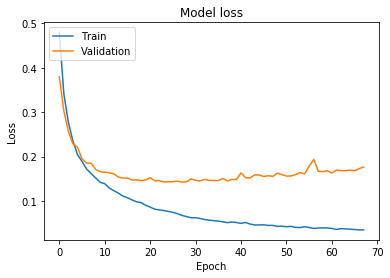

Training bag 1
(15552, 1)
(15552,)
[2.44921446e-03 4.18424606e-05 6.50882721e-05 ... 1.09442115e-01
 5.43892384e-04 7.97492266e-03]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 1)
(6051,)
Saved to result_boosting_lstm_new_boost1.csv
[0.0840852  0.91588598 0.84366545 ... 0.08151278 0.89537039 0.32607281]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 21s - loss: 0.6827 - accuracy: 0.5673 - auc_3: 0.5389 - val_loss: 0.6684 - val_accuracy: 0.5646 - val_auc_3: 0.5671
Epoch 2/250
9330/9330 - 18s - loss: 0.6645 - accuracy: 0.6038 - auc_3: 0.6142 - val_loss: 0.6740 - val_accuracy: 0.4746 - val_auc_3: 0.5393
Epoch 3/250
9330/9330 - 17s - loss: 0.6497 - accuracy: 0.6240 - auc_3: 0.6614 - val_loss: 0.6889 - val_accuracy: 0.4553 - val_auc_3: 0.5042
Epoch 4/250
9330/9330 - 18s - loss: 0.6310 - accuracy: 0.6478 - auc_3: 0.7055 - val_loss: 0.6988 - val_accuracy: 0.4624 - val_auc_3: 0.4849
Epoch 5/250
9330/9330 - 17s - loss: 0.6090 - accuracy: 0.6712 - auc_3: 0.7407 - val_loss: 0.7189 - val_accuracy: 0.4556 - val_auc_3: 0.4484
Epoch 6/250
9330/9330 - 17s - loss: 0.5888 - accuracy: 0.6950 - auc_3: 0.7647 - val_loss: 0.7355 - val_accuracy: 0.43

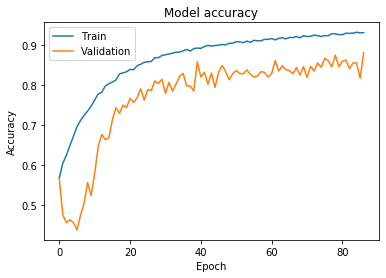

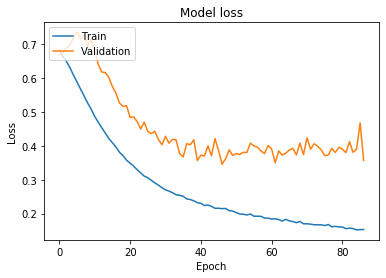

Training bag 2
(15552, 2)
(15552,)
[0.00560641 0.3403914  0.00471026 ... 0.13810919 0.00905776 0.45767629]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 2)
(6051,)
Saved to result_boosting_lstm_new_boost2.csv
[0.17207786 0.53901955 0.46066767 ... 0.27287233 0.20409642 0.25853541]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 20s - loss: 0.6150 - accuracy: 0.6573 - auc_5: 0.7103 - val_loss: 0.5253 - val_accuracy: 0.8563 - val_auc_5: 0.9099
Epoch 2/250
9330/9330 - 17s - loss: 0.5208 - accuracy: 0.7402 - auc_5: 0.8216 - val_loss: 0.4524 - val_accuracy: 0.8174 - val_auc_5: 0.9312
Epoch 3/250
9330/9330 - 17s - loss: 0.4589 - accuracy: 0.7823 - auc_5: 0.8635 - val_loss: 0.3974 - val_accuracy: 0.8633 - val_auc_5: 0.9366
Epoch 4/250
9330/9330 - 17s - loss: 0.4230 - accuracy: 0.8068 - auc_5: 0.8812 - val_loss: 0.3371 - val_accuracy: 0.8965 - val_auc_5: 0.9519
Epoch 5/250
9330/9330 - 18s - loss: 0.3974 - accuracy: 0.8196 - auc_5: 0.8945 - val_loss: 0.3164 - val_accuracy: 0.8958 - val_auc_5: 0.9595
Epoch 6/250
9330/9330 - 17s - loss: 0.3787 - accuracy: 0.8280 - auc_5: 0.9030 - val_loss: 0.2957 - val_accuracy: 0.90

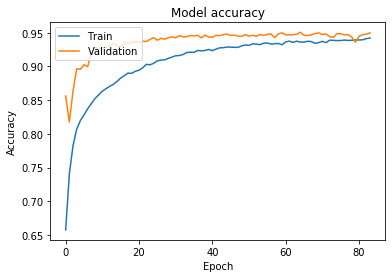

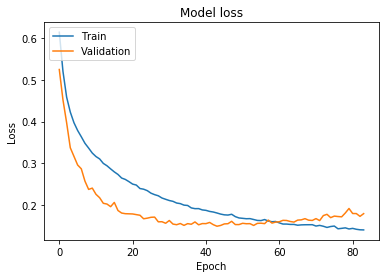

Training bag 3
(15552, 3)
(15552,)
[0.00543642 0.22692996 0.006212   ... 0.14836992 0.00823897 0.30646294]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 3)
(6051,)
Saved to result_boosting_lstm_new_boost3.csv
[0.16145344 0.06355828 0.36692011 ... 0.12450045 0.2196663  0.30523106]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 20s - loss: 0.6353 - accuracy: 0.6273 - auc_7: 0.6743 - val_loss: 0.5431 - val_accuracy: 0.8424 - val_auc_7: 0.9071
Epoch 2/250
9330/9330 - 17s - loss: 0.5755 - accuracy: 0.6910 - auc_7: 0.7613 - val_loss: 0.4659 - val_accuracy: 0.8469 - val_auc_7: 0.9416
Epoch 3/250
9330/9330 - 18s - loss: 0.5250 - accuracy: 0.7348 - auc_7: 0.8137 - val_loss: 0.3856 - val_accuracy: 0.8974 - val_auc_7: 0.9536
Epoch 4/250
9330/9330 - 18s - loss: 0.4868 - accuracy: 0.7642 - auc_7: 0.8419 - val_loss: 0.3407 - val_accuracy: 0.9045 - val_auc_7: 0.9624
Epoch 5/250
9330/9330 - 17s - loss: 0.4579 - accuracy: 0.7854 - auc_7: 0.8590 - val_loss: 0.3069 - val_accuracy: 0.9116 - val_auc_7: 0.9699
Epoch 6/250
9330/9330 - 17s - loss: 0.4343 - accuracy: 0.7947 - auc_7: 0.8736 - val_loss: 0.2724 - val_accuracy: 0.91

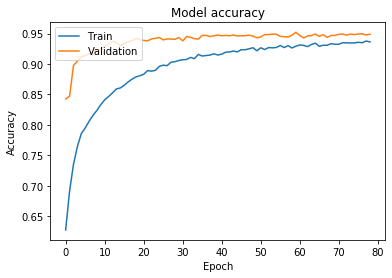

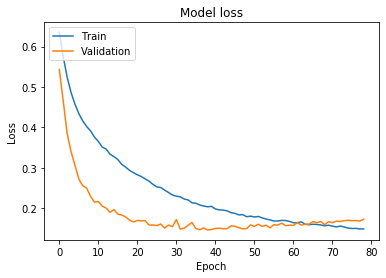

Training bag 4
(15552, 4)
(15552,)
[0.00497365 0.17021132 0.00467658 ... 0.16450608 0.01183397 0.23034739]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 4)
(6051,)
Saved to result_boosting_lstm_new_boost4.csv
[0.17214668 0.35091209 0.1151309  ... 0.03930579 0.12835586 0.00437391]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 20s - loss: 0.6462 - accuracy: 0.6156 - auc_9: 0.6448 - val_loss: 0.5550 - val_accuracy: 0.8415 - val_auc_9: 0.9126
Epoch 2/250
9330/9330 - 18s - loss: 0.5931 - accuracy: 0.6920 - auc_9: 0.7403 - val_loss: 0.4747 - val_accuracy: 0.8778 - val_auc_9: 0.9402
Epoch 3/250
9330/9330 - 18s - loss: 0.5536 - accuracy: 0.7277 - auc_9: 0.7834 - val_loss: 0.4145 - val_accuracy: 0.8916 - val_auc_9: 0.9528
Epoch 4/250
9330/9330 - 17s - loss: 0.5198 - accuracy: 0.7521 - auc_9: 0.8109 - val_loss: 0.3541 - val_accuracy: 0.9084 - val_auc_9: 0.9636
Epoch 5/250
9330/9330 - 18s - loss: 0.4903 - accuracy: 0.7736 - auc_9: 0.8337 - val_loss: 0.3429 - val_accuracy: 0.9071 - val_auc_9: 0.9690
Epoch 6/250
9330/9330 - 18s - loss: 0.4717 - accuracy: 0.7825 - auc_9: 0.8455 - val_loss: 0.3015 - val_accuracy: 0.92

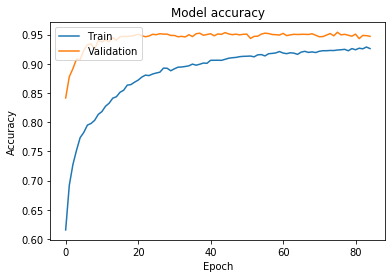

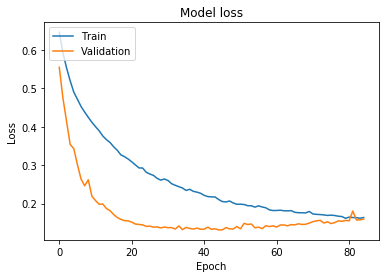

Training bag 5
(15552, 5)
(15552,)
[0.00520945 0.13617003 0.00374901 ... 0.16523096 0.01461112 0.18437368]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 5)
(6051,)
Saved to result_boosting_lstm_new_boost5.csv
[0.19671655 0.10721435 0.47534472 ... 0.12715568 0.22277315 0.08705062]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 20s - loss: 0.6495 - accuracy: 0.6090 - auc_11: 0.6364 - val_loss: 0.6168 - val_accuracy: 0.6707 - val_auc_11: 0.8896
Epoch 2/250
9330/9330 - 17s - loss: 0.6040 - accuracy: 0.6782 - auc_11: 0.7260 - val_loss: 0.5209 - val_accuracy: 0.8376 - val_auc_11: 0.9301
Epoch 3/250
9330/9330 - 17s - loss: 0.5691 - accuracy: 0.7104 - auc_11: 0.7688 - val_loss: 0.4663 - val_accuracy: 0.8550 - val_auc_11: 0.9432
Epoch 4/250
9330/9330 - 17s - loss: 0.5402 - accuracy: 0.7350 - auc_11: 0.7942 - val_loss: 0.3920 - val_accuracy: 0.8826 - val_auc_11: 0.9529
Epoch 5/250
9330/9330 - 17s - loss: 0.5165 - accuracy: 0.7540 - auc_11: 0.8107 - val_loss: 0.3553 - val_accuracy: 0.8913 - val_auc_11: 0.9587
Epoch 6/250
9330/9330 - 17s - loss: 0.4923 - accuracy: 0.7685 - auc_11: 0.8278 - val_loss: 0.3322 - val_acc

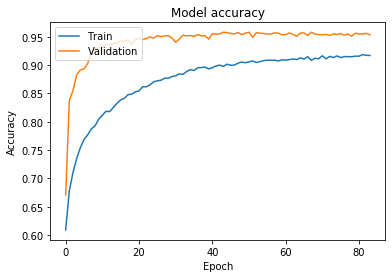

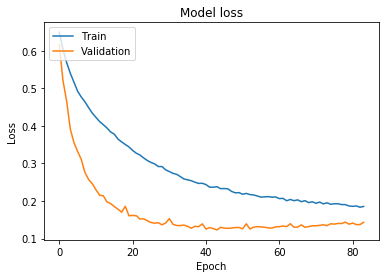

Training bag 6
(15552, 6)
(15552,)
[0.00473839 0.11348051 0.00532764 ... 0.17760831 0.01758891 0.15787715]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 6)
(6051,)
Saved to result_boosting_lstm_new_boost6.csv
[0.07197571 0.29860842 0.16490188 ... 0.05830318 0.01784486 0.19172995]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 23s - loss: 0.6442 - accuracy: 0.6285 - auc_13: 0.6574 - val_loss: 0.5565 - val_accuracy: 0.8315 - val_auc_13: 0.9035
Epoch 2/250
9330/9330 - 17s - loss: 0.6028 - accuracy: 0.6838 - auc_13: 0.7305 - val_loss: 0.5075 - val_accuracy: 0.8489 - val_auc_13: 0.9334
Epoch 3/250
9330/9330 - 17s - loss: 0.5736 - accuracy: 0.7069 - auc_13: 0.7627 - val_loss: 0.4271 - val_accuracy: 0.8907 - val_auc_13: 0.9470
Epoch 4/250
9330/9330 - 17s - loss: 0.5490 - accuracy: 0.7325 - auc_13: 0.7856 - val_loss: 0.3819 - val_accuracy: 0.9006 - val_auc_13: 0.9561
Epoch 5/250
9330/9330 - 17s - loss: 0.5305 - accuracy: 0.7462 - auc_13: 0.7985 - val_loss: 0.3431 - val_accuracy: 0.9016 - val_auc_13: 0.9618
Epoch 6/250
9330/9330 - 18s - loss: 0.5146 - accuracy: 0.7490 - auc_13: 0.8087 - val_loss: 0.3199 - val_acc

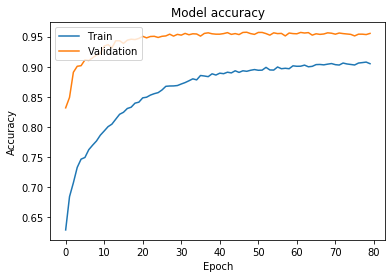

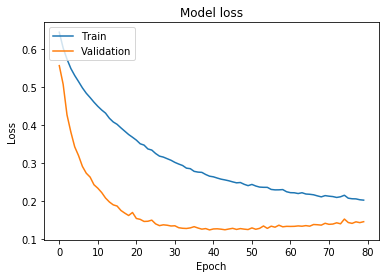

Training bag 7
(15552, 7)
(15552,)
[0.00493634 0.09728664 0.00457299 ... 0.17834708 0.01517063 0.1760059 ]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 7)
(6051,)
Saved to result_boosting_lstm_new_boost7.csv
[0.03172208 0.2255896  0.2307255  ... 0.23034027 0.39649487 0.68640572]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 23s - loss: 0.6479 - accuracy: 0.6203 - auc_15: 0.6361 - val_loss: 0.5657 - val_accuracy: 0.7768 - val_auc_15: 0.9133
Epoch 2/250
9330/9330 - 17s - loss: 0.6062 - accuracy: 0.6740 - auc_15: 0.7140 - val_loss: 0.4783 - val_accuracy: 0.8707 - val_auc_15: 0.9415
Epoch 3/250
9330/9330 - 17s - loss: 0.5784 - accuracy: 0.7043 - auc_15: 0.7483 - val_loss: 0.4142 - val_accuracy: 0.8929 - val_auc_15: 0.9530
Epoch 4/250
9330/9330 - 17s - loss: 0.5591 - accuracy: 0.7207 - auc_15: 0.7654 - val_loss: 0.3838 - val_accuracy: 0.9013 - val_auc_15: 0.9604
Epoch 5/250
9330/9330 - 17s - loss: 0.5416 - accuracy: 0.7310 - auc_15: 0.7822 - val_loss: 0.3672 - val_accuracy: 0.8932 - val_auc_15: 0.9650
Epoch 6/250
9330/9330 - 17s - loss: 0.5246 - accuracy: 0.7433 - auc_15: 0.7974 - val_loss: 0.3294 - val_acc

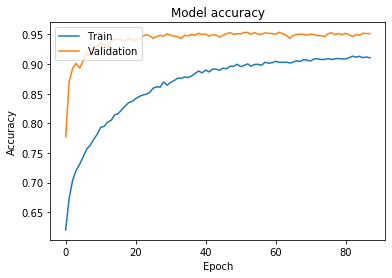

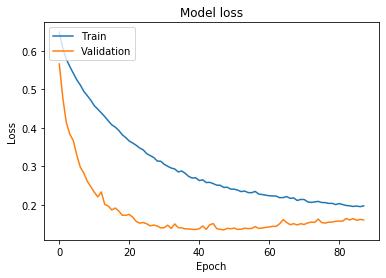

Training bag 8
(15552, 8)
(15552,)
[0.00452697 0.08514011 0.00402898 ... 0.17866957 0.01333857 0.15964782]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 8)
(6051,)
Saved to result_boosting_lstm_new_boost8.csv
[0.00893992 0.18169907 0.17167257 ... 0.22526455 0.34883907 0.68182567]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 23s - loss: 0.6568 - accuracy: 0.6026 - auc_17: 0.6158 - val_loss: 0.6282 - val_accuracy: 0.5254 - val_auc_17: 0.9031
Epoch 2/250
9330/9330 - 17s - loss: 0.6233 - accuracy: 0.6501 - auc_17: 0.6882 - val_loss: 0.5433 - val_accuracy: 0.8453 - val_auc_17: 0.9393
Epoch 3/250
9330/9330 - 17s - loss: 0.6034 - accuracy: 0.6798 - auc_17: 0.7223 - val_loss: 0.4682 - val_accuracy: 0.8871 - val_auc_17: 0.9552
Epoch 4/250
9330/9330 - 17s - loss: 0.5827 - accuracy: 0.7039 - auc_17: 0.7477 - val_loss: 0.4222 - val_accuracy: 0.9077 - val_auc_17: 0.9632
Epoch 5/250
9330/9330 - 17s - loss: 0.5610 - accuracy: 0.7257 - auc_17: 0.7685 - val_loss: 0.3774 - val_accuracy: 0.9135 - val_auc_17: 0.9684
Epoch 6/250
9330/9330 - 17s - loss: 0.5450 - accuracy: 0.7357 - auc_17: 0.7809 - val_loss: 0.3543 - val_acc

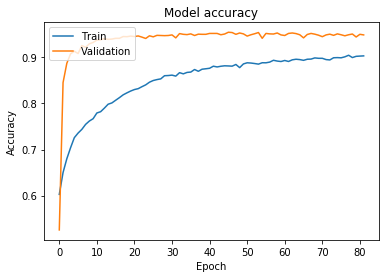

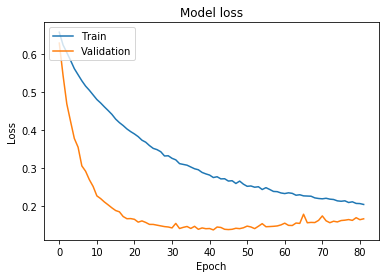

Training bag 9
(15552, 9)
(15552,)
[0.0042538  0.07586408 0.00358361 ... 0.17383356 0.01544762 0.14535058]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 9)
(6051,)
Saved to result_boosting_lstm_new_boost9.csv
[0.03638679 0.04784116 0.25652504 ... 0.32241252 0.6583693  0.15752822]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 22s - loss: 0.6550 - accuracy: 0.6065 - auc_19: 0.6279 - val_loss: 0.5678 - val_accuracy: 0.7749 - val_auc_19: 0.9046
Epoch 2/250
9330/9330 - 18s - loss: 0.6185 - accuracy: 0.6581 - auc_19: 0.7033 - val_loss: 0.5009 - val_accuracy: 0.8653 - val_auc_19: 0.9377
Epoch 3/250
9330/9330 - 17s - loss: 0.5975 - accuracy: 0.6837 - auc_19: 0.7333 - val_loss: 0.4427 - val_accuracy: 0.8868 - val_auc_19: 0.9532
Epoch 4/250
9330/9330 - 17s - loss: 0.5782 - accuracy: 0.7031 - auc_19: 0.7542 - val_loss: 0.3884 - val_accuracy: 0.9090 - val_auc_19: 0.9630
Epoch 5/250
9330/9330 - 17s - loss: 0.5595 - accuracy: 0.7253 - auc_19: 0.7709 - val_loss: 0.3577 - val_accuracy: 0.9190 - val_auc_19: 0.9679
Epoch 6/250
9330/9330 - 17s - loss: 0.5438 - accuracy: 0.7377 - auc_19: 0.7867 - val_loss: 0.3500 - val_acc

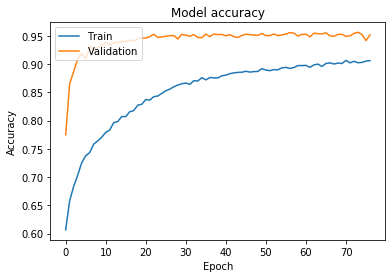

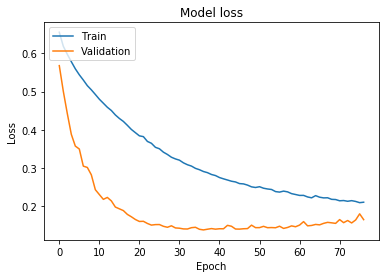

In [3]:
import os
import matplotlib.pyplot as plt
import csv
import math
from data import Data

%matplotlib inline
    
training_loss = np.ones(train_data_x.shape[0])

for bag in range(num_of_bags):
    # skip training
    if bag < start_from_bag:
        print("skiping bag "+str(bag))
        continue
    print("Training bag "+str(bag))

    # Put data into bags
    model = create_model(False)
    train_size = train_data_x.shape[0]//10*6
    if bag != 0 :
        # Check prediction for training data
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(train_data_x)
            else:
                predictions = np.concatenate((predictions,model.predict(train_data_x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        # Select training data poorly predicted 
        training_loss = avg_predictions-np.reshape(train_data_y,(train_data_y.shape[0]))
        training_loss = np.absolute(training_loss)
        print(training_loss)
        
        # Save Predictions for test data
        test_data = Data(data_type='test')
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(test_data.x)
            else:
                predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        output_file = 'result_' + model_name +'_boost'+ str(bag) +'.csv'
        with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerow(('Id', 'Predicted'))
            for id, predict in enumerate(avg_predictions):
                csv_writer.writerow((id, predict))
        print('Saved to '+'result_' + model_name +'_boost'+ str(bag) +'.csv')
        # Free memory space for test data
        del test_data
        
        
    
    weights = training_loss / np.sum(training_loss, axis=0)
    idx = np.random.choice(np.arange(0, weights.shape[0]),train_size, p=weights)
    print(training_loss[idx])
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]
        
    del model
        
    ## TODO define different models if possible
    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=40, 
        mode='auto', 
        restore_best_weights=True)
        
        
        
    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=40,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    del model,history,bag_x,bag_y
    

## Restore Weights

In [4]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np
from data import Data

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))

for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)

Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Test data: x:(6051, 1000, 102) y:(6051, 1)
(6051, 10)
(6051,)




## Save Prediction to CSV

In [5]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')

Saved to result_boosting_lstm_new.csv


# Prediction results

In [6]:
model = create_model()
for validate_bag in range(num_of_bags):
    print("Bag" +str(validate_bag))
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if validate_bag == 0:
        train_predictions = model.predict(train_data_x)
        val_predictions = model.predict(val_data_x)
    else:
        train_predictions = np.concatenate((train_predictions,model.predict(train_data_x)),axis=1)
        val_predictions = np.concatenate((val_predictions,model.predict(val_data_x)),axis=1)
print(train_predictions.shape,val_predictions.shape)




Bag0
Bag1
Bag2
Bag3
Bag4
Bag5
Bag6
Bag7
Bag8
Bag9
(15552, 10) (3110, 10)


# Model

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_36 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Train on 15552 samples, validate on 3110 samples
Epoch 1/2000
15552/15552 - 1s - loss: 0.6067 - accuracy: 0.5445 - auc: 0.8639 - val_loss: 0.5431 - val_accuracy: 0.6174 - val_auc: 0.9798
Epoch 2/2000
15552/15552 - 0s - loss: 0.5366 - accuracy: 0.6004 - auc: 0.9617 - val_loss: 0.4845 - val_accuracy: 0.7113 - val_auc: 0.9889
Epoch 3/2000
15552/15552 - 0s - loss: 0.4899 - accuracy: 0.7

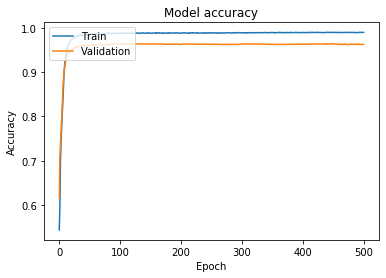

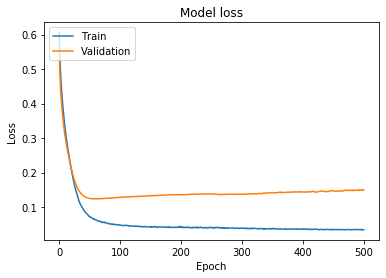

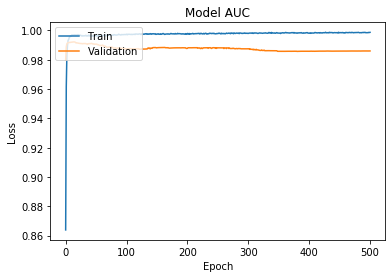

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(rate=0.2),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
          optimizer=tf.keras.optimizers.Adam(1e-3,0.9,0.999),
          metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
    

model.summary()


early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    min_delta=0, 
    patience=500, 
    mode='auto', 
    restore_best_weights=True)

history = model.fit(x=train_predictions,y=train_data_y, validation_data=(val_predictions,val_data_y), epochs=2000,batch_size=1000,
                callbacks=[early_stopping_callback], verbose=2,shuffle=True)

print()

import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation AUC values
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [13]:
checkpoint_dir = './checkpoints/' + model_name
old_model = create_model()

import numpy as np
from data import Data

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))

for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    old_model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = old_model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,old_model.predict(test_data.x)),axis=1)
print(predictions.shape)

new_predictions = model.predict(predictions)




import csv

output_file = 'result_nned_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(new_predictions):
        csv_writer.writerow((id, predict[0]))
print('Saved to '+'result_nned_' + model_name + '.csv')



Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Test data: x:(6051, 1000, 102) y:(6051, 1)
(6051, 10)
Saved to result_nned_boosting_lstm_new.csv
